<a href="https://colab.research.google.com/github/DrewRust/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/U1S3M4_AndrewRust_Assignment_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.sample(5)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
208,8810158,B,13.11,22.54,87.02,529.4,0.10020,0.14830,0.08705,0.05102,0.1850,0.07310,0.1931,0.9223,1.491,15.09,0.005251,0.03041,0.02526,0.008304,0.02514,0.004198,14.55,29.16,99.48,639.3,0.1349,0.4402,0.3162,0.11260,0.4128,0.10760,NaN
15,84799002,M,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.04240,0.04741,0.010900,0.01857,0.005466,17.46,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.17120,0.4218,0.13410,NaN
93,862009,B,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,0.2950,1.3730,2.099,25.22,0.005884,0.01491,0.01872,0.009366,0.01884,0.001817,15.10,25.94,97.59,699.4,0.1339,0.1751,0.1381,0.07911,0.2678,0.06603,NaN
426,907409,B,10.48,14.98,67.49,333.6,0.09816,0.10130,0.06335,0.02218,0.1925,0.06915,0.3276,1.1270,2.564,20.77,0.007364,0.03867,0.05263,0.012640,0.02161,0.004830,12.13,21.57,81.41,440.4,0.1327,0.2996,0.2939,0.09310,0.3020,0.09646,NaN
374,9013005,B,13.69,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.02031,0.1872,0.05669,0.1705,0.5066,1.372,14.00,0.004230,0.01587,0.01169,0.006335,0.01943,0.002177,14.84,20.21,99.16,670.6,0.1105,0.2096,0.1346,0.06987,0.3323,0.07701,NaN


In [149]:
# Benign or Malignant
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [119]:
# Depending on the code I'm running this may or may not be dropped
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


Data Expoloration is done below.

In [0]:
# Perform K-Means Clustering on the Dataset

k = 3
model = KMeans(n_clusters=k, max_iter=1)

In [0]:
# THIS IS CELL IS STILL A WORK IN PROGRESS:
# can use however many PCAs you would like than input PCAs into the data
# append to distortion the intertia of the model
# k you choose for kmeans 
# components does not equal n_clusters
# clustering is unsupervised
# later on when we train models we won't know what the answer is whether it's cancer or benign
distortion = []
for k in range(1, 10):
  model = KMeans(n_clusters=k)
  model.fit

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


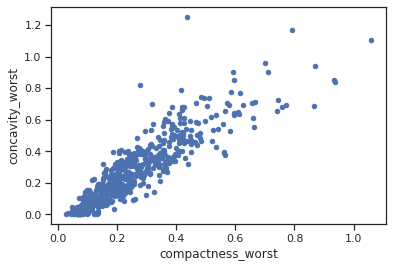

In [152]:
feature_test1 = ['compactness_worst', 'concavity_worst']
df[feature_test1].plot(kind='scatter', x=feature_test1[0], y=feature_test1[1]);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


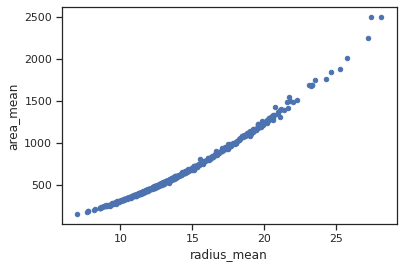

In [153]:
feature_test2 = ['radius_mean', 'area_mean']
df[feature_test2].plot(kind='scatter', x=feature_test2[0], y=feature_test2[1])

In [0]:
# Pair plot with the help of Eyve and Kush
import seaborn as sns; sns.set(style='ticks', color_codes=True)

In [0]:
# first 4 columns without the diagnosis column (columns 1 - 4):
df1 = df[df.columns[0:5]]

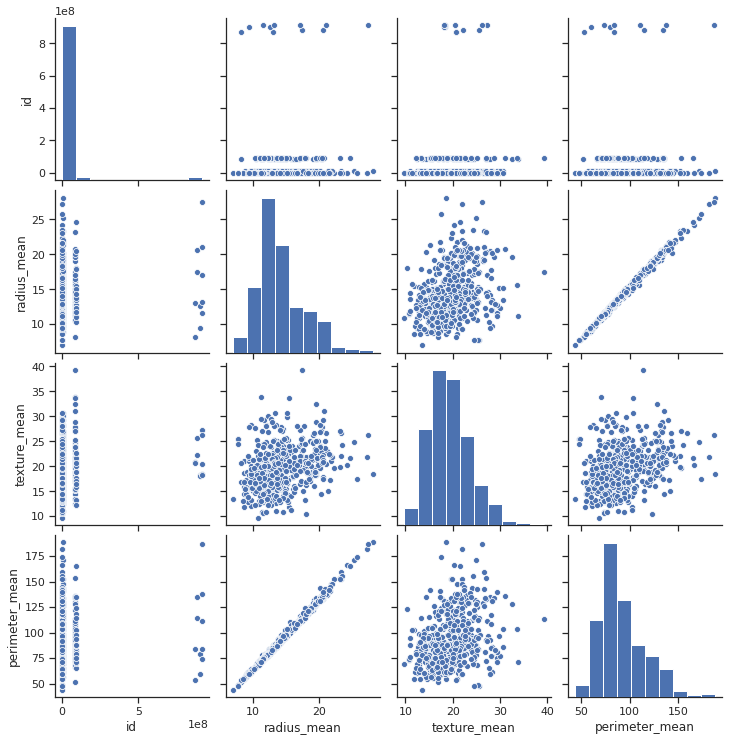

In [156]:
pair_plt = sns.pairplot(df1)

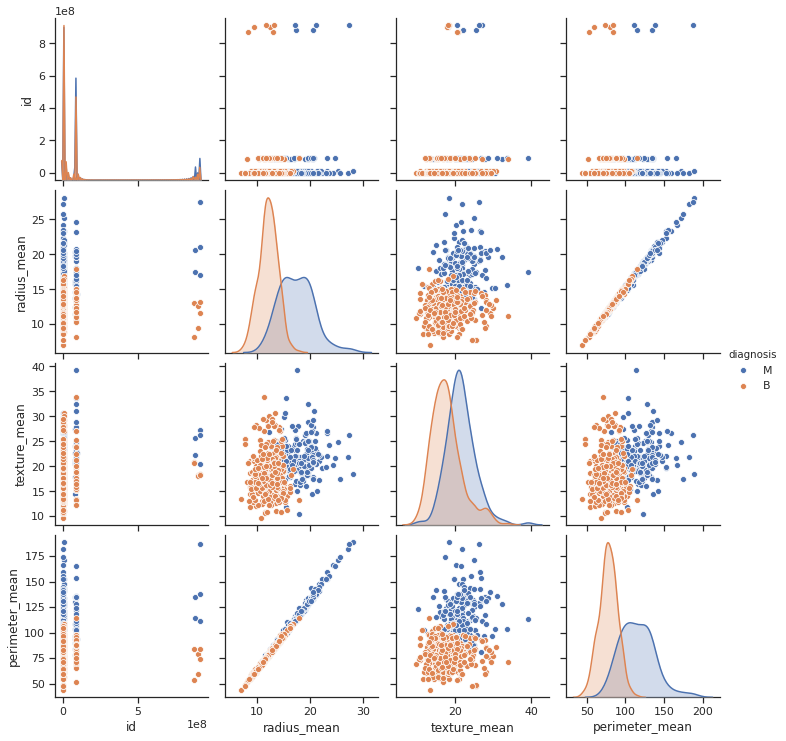

In [157]:
# first 4 columns With the diagnosis column: 
# (when you run this df['diagnosis'] has to not have been dropped)
# using df1 from above
pair_plt = sns.pairplot(df1, hue='diagnosis')

In [158]:
print(list(df.columns))

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [159]:
# There's a lot of columns
print(len(list(df.columns)))

33


In [160]:
# Remove the id column I don't need it
feature_cols = df.columns[1:]
feature_cols[:5]

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean'],
      dtype='object')

In [0]:
features = ['radius_mean', 'texture_mean']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


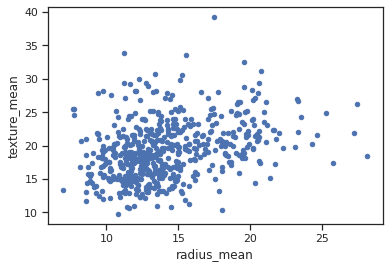

In [162]:
# plot them to see how they look.
df[features].plot(kind='scatter', x=features[0], y=features[1]);

## Check you work: (done above)

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [163]:
# Your code here
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [0]:
df = df.drop('diagnosis', axis=1)

In [0]:
df = df.drop('id', axis=1)

In [0]:
df = df.drop('Unnamed: 32', axis=1)

In [167]:
df.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [168]:
# Standardizing the data 
from sklearn.preprocessing import StandardScaler
feature_cols=df.columns[1:]
feature_cols[:5]

Index(['texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
       'compactness_mean'],
      dtype='object')

In [169]:
# normalizing the features
x = df.loc[:, feature_cols].values
x = StandardScaler().fit_transform(x)
x

array([[-2.07333501,  1.26993369,  0.9843749 , ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.35363241,  1.68595471,  1.90870825, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.45618695,  1.56650313,  1.55888363, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 2.0455738 ,  0.67267578,  0.57795264, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 2.33645719,  1.98252415,  1.73521799, ...,  2.28998549,
         1.91908301,  2.21963528],
       [ 1.22179204, -1.81438851, -1.34778924, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [0]:
# use the sklearn library to import the PCA module
from sklearn.decomposition import PCA

In [0]:
# instantiate the sklearn class & pass the desired number of components 
pca_cancer = PCA(n_components=2)

In [0]:
# call fit_transform on the aggregate data
pca_data = pca_cancer.fit_transform(x)

In [173]:
# create a DataFrame with principal component values for all 569 samples
df_final = pd.DataFrame(data=pca_data, columns=['comp1', 'comp2'])
df_final.head()

,comp1,comp2
0,9.235605,1.426035
1,1.891443,-3.611959
2,5.474754,-1.230815
3,7.859774,9.691994
4,3.561768,-1.901793


In [175]:
# add back in the type of diagnosis 'M' or 'B'
df_final['diagnosis']=df['diagnosis']
df_final.sample(5)

,comp1,comp2,diagnosis
134,1.843001,-2.799507,M
108,12.885646,0.370924,M
295,-3.428148,-1.179026,B
492,2.885414,-1.281569,M
132,1.213129,-1.170224,M


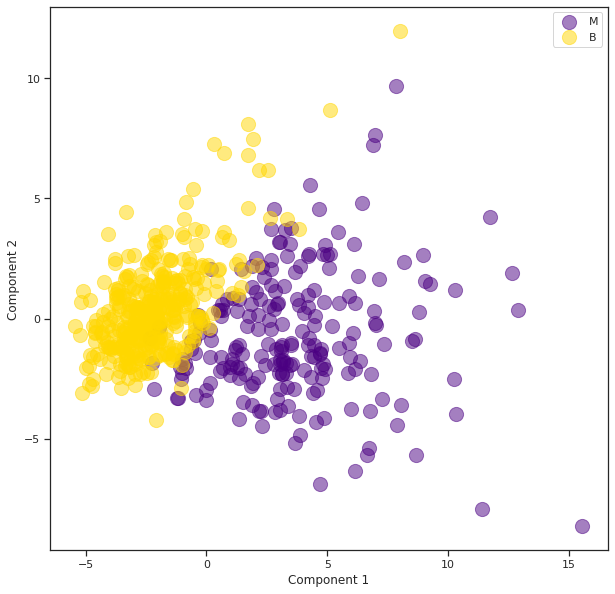

In [179]:
# plot the visualization of the data by the components
# Have to set the letters M and B to strings
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
for k, c in [('M', 'indigo'), ('B', 'gold')]:
  subset=df_final[df_final['diagnosis']==k]
  plt.scatter(x=subset['comp1'],
              y=subset['comp2'],
              s=200,
              alpha=.5,
              color=c,
              label=k)
plt.legend();

# 2) Perform PCA on your dataset first and *then* use k-means clustering (all done).

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset

##Standardize Data (done)

In [0]:
df.head(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [0]:
df.isnull().sum()

In [0]:
# dropping last column full of nulls
df.drop(['Unnamed: 32'], axis=1, inplace=True)

In [0]:
df.isnull().sum().sum()

0

In [0]:
# make lists of categorical and numeric columns
cat_cols = df.columns[df.dtypes=='object']
num_cols = df.columns[df.dtypes!='object']

In [0]:
# There are only numerical columns
print(len(cat_cols))
len(num_cols)

0


31

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# Remove the id column I don't need it
feature_cols = df.columns[1:]
feature_cols[:5]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean'],
      dtype='object')

In [0]:
x = df.loc[:, feature_cols].values
x = StandardScaler().fit_transform(x)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [0]:
print(np.mean(x))
print('{:.2f}'.format(np.mean(x)))

1.2487570048507913e-18
0.00


In [0]:
print(round(np.std(x), 1))

1.0


In [0]:
bc_df_processed = pd.DataFrame(x, columns=feature_cols)
bc_df_processed.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## PC1 and PC2 Cluster (done)

In [0]:
# Now that everything is standardized we can begin PCA
from sklearn.decomposition import PCA

In [0]:
canc_ch = PCA(n_components=2)

In [0]:
cancer_data = canc_ch.fit_transform(x)

In [0]:
df_final = pd.DataFrame(data=cancer_data, columns=['pca_1', 'pca_2'])
df_final.head()

,pca_1,pca_2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [0]:
canc_ch.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [0]:
# how much total variance did we explain?
sum(canc_ch.explained_variance_ratio_)

0.6324320765155951

In [0]:
1-sum(canc_ch.explained_variance_ratio_)

0.3675679234844049

In [0]:
import matplotlib.pyplot as plt

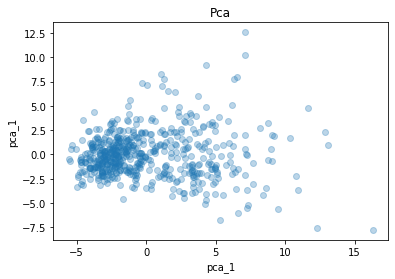

In [0]:
# It looks nicer because I added back in 'diagnosis' above
plt.scatter(df_final['pca_1'], df_final['pca_2'], alpha=.3)

plt.title('Pca')

plt.xlabel('pca_1')

plt.ylabel('pca_1')

plt.show()

In [0]:
# plot the visualization of the data by the components
# Have to set the letters M and B to strings
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
for k, c in [('M', 'indigo'), ('B', 'gold')]:
  subset=df_final[df_final['diagnosis']==k]
  plt.scatter(x=subset['comp1'],
              y=subset['comp2'],
              s=200,
              alpha=.5,
              color=c,
              label=k)
plt.legend();

##Scree Plot (done)

In [0]:
# There are nulls in the last column need to eliminate
df.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [0]:
# dropping last column full of nulls
df.drop(['Unnamed: 32'], axis=1, inplace=True)

In [0]:
# now there are no nulls
df.isnull().sum().sum()

0

In [0]:
# make lists of categorical and numeric columns
cat_cols = df.columns[df.dtypes=='object']
num_cols = df.columns[df.dtypes!='object']

In [0]:
# There are only numerical columns
print(len(cat_cols))
len(num_cols)

0


31

In [0]:
# BEST PRACTICE to make a copy
diagnostic_can = df.copy()

In [0]:
# import and initiate sklearn class
from sklearn.preprocessing import StandardScaler
myscaler = StandardScaler()

In [0]:
# standardize the dataset
diagnostic_can = myscaler.fit_transform(diagnostic_can)

In [0]:
# look at first row of data
diagnostic_can[:1]

array([[-0.23640517,  1.09706398, -2.07333501,  1.26993369,  0.9843749 ,
         1.56846633,  3.28351467,  2.65287398,  2.53247522,  2.21751501,
         2.25574689,  2.48973393, -0.56526506,  2.83303087,  2.48757756,
        -0.21400165,  1.31686157,  0.72402616,  0.66081994,  1.14875667,
         0.90708308,  1.88668963, -1.35929347,  2.30360062,  2.00123749,
         1.30768627,  2.61666502,  2.10952635,  2.29607613,  2.75062224,
         1.93701461]])

In [0]:
# mean should be zero
diagnostic_can.mean()

3.4240111423328146e-18

In [0]:
# standard deviation should be 1
diagnostic_can.std()

1.0

In [0]:
# import and initiate PCA class choose 10 components
from sklearn.decomposition import PCA
mypca = PCA(n_components=10)

In [0]:
# Apply PCA to the data
pca_features = mypca.fit_transform(diagnostic_can)

In [0]:
# Now there are only 10 columns of data
pca_features[:1]

array([[ 9.18319983,  1.97127137, -1.17162471,  3.6393323 , -1.19309841,
        -1.37228031,  0.3718442 ,  2.18052842, -0.23161911, -0.09038915]])

In [0]:
# take a look at the results
pd.DataFrame(pca_features)

,0,1,2,3,4,5,6,7,8,9
0,9.183200,1.971271,-1.171625,3.639332,-1.193098,-1.372280,0.371844,2.180528,-0.231619,-0.090389
1,2.383298,-3.753459,-0.580229,1.127438,0.624850,-0.126616,-0.288270,0.044935,0.426924,-0.659939
2,5.742472,-1.080350,-0.533088,0.903470,-0.180601,-0.401855,0.463188,-0.715208,-0.010709,-0.082320
3,7.124384,10.272225,-3.150161,0.121512,-2.968055,-2.561668,1.950177,1.287991,1.272647,-1.171403
4,3.945694,-1.959689,1.401177,2.937555,0.540853,1.233300,-0.205435,-0.959329,0.629116,-0.166350
...,...,...,...,...,...,...,...,...,...,...
564,6.435329,-3.565358,2.399112,1.197814,-0.071089,2.028789,-1.345195,-0.522453,-0.184005,1.045664
565,3.789458,-3.573419,2.029505,-2.478688,-0.498521,-0.080423,-1.024112,-0.585571,-0.949732,-0.258752
566,1.251890,-1.893977,0.534467,-2.077633,1.814829,0.394713,-0.437806,-0.178669,0.262118,0.475978
567,10.365035,1.696398,-1.907418,-2.351807,-0.028220,-0.656719,-0.195263,0.275202,-0.072783,-0.518179


In [0]:
mypca.explained_variance_ratio_

array([0.42864701, 0.18376792, 0.09146436, 0.06391475, 0.05318759,
       0.03982815, 0.0315572 , 0.02166945, 0.01486427, 0.01300429])

In [0]:
sum(mypca.explained_variance_ratio_)

0.9419049919773116

In [0]:
1-sum(mypca.explained_variance_ratio_)

0.05809500802268841

In [0]:
# define the number of components
num_components = len(mypca.explained_variance_ratio_)
num_components

10

In [0]:
ind = np.arange(num_components)
ind

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
vals = mypca.explained_variance_ratio_
vals

array([0.42864701, 0.18376792, 0.09146436, 0.06391475, 0.05318759,
       0.03982815, 0.0315572 , 0.02166945, 0.01486427, 0.01300429])

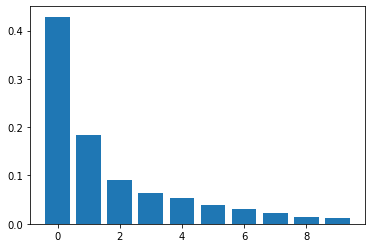

In [0]:
plt.bar(ind, vals);

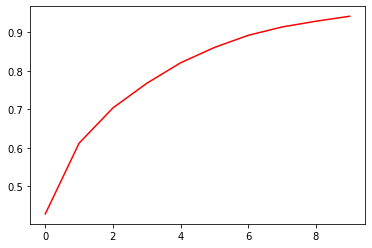

In [0]:
import matplotlib.pyplot as plt
cumvals = np.cumsum(vals)
plt.plot(ind, cumvals, c='r');

In [0]:
# Define scree plot function
# GENERIC FOR ANY PCA put into the function as a parameter
def scree_plot(pca):

    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(12, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals, c='r')
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

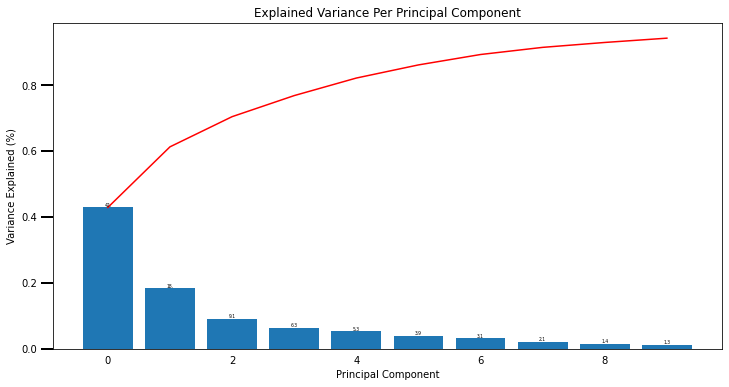

In [0]:
scree_plot(mypca)

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

The only way to compare the raw data was with the seaborn plot.

**Processing the data with PCA actually works way better than when simply using raw data.  There is just simply too much raw data and the fact that it's not standardized makes it essentially impossible to compare results.**

There is a great article here: 

https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32


Per the article above: 

"Dimensionality Reduction plays a really important role in machine learning, especially when you are working with thousands of features. Principal Components Analysis are one of the top dimensionality reduction algorithm, it is not hard to understand and use it in real projects. This technique, in addition to making the work of feature manipulation easier, it still helps to improve the results of the classifier, as we saw in this post.
Finally, the answer of the initial questioning is yes, indeed Principal Component Analysis helps improve the outcome of a classifier."

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project

In [0]:
# Spent my extra time wrapping my head around all the notes for this homework. 
# I had some trouble getting my bearings for this project.  Overall I feel like I 
# understood the majority of it.  It's just applying it FULLY I'm still working on.